In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [8]:
order_products_train = pd.read_csv("order_products__train.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")

In [10]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
orders.head()

,order_id,order_id.1,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,NaN,NaN,NaN
2,473747,1,prior,3,3,12,21.0,NaN,NaN,NaN
3,2254736,1,prior,4,4,7,29.0,NaN,NaN,3421083.0
4,431534,1,prior,5,4,15,28.0,NaN,NaN,NaN


In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
print(orders["eval_set"].value_counts())
print(orders["eval_set"].value_counts(normalize = True))

prior    985475
train     40096
test      23004
Name: eval_set, dtype: int64
prior    0.939823
train    0.038239
test     0.021938
Name: eval_set, dtype: float64


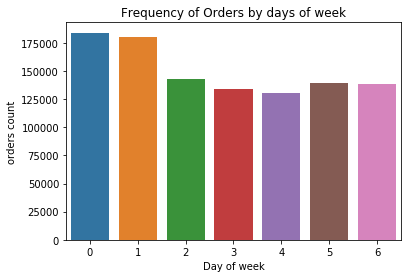

In [30]:
sns.countplot(x="order_dow",data = orders)
plt.xlabel("Day of week")
plt.ylabel("orders count")
plt.title("Frequency of Orders by days of week")
plt.show()

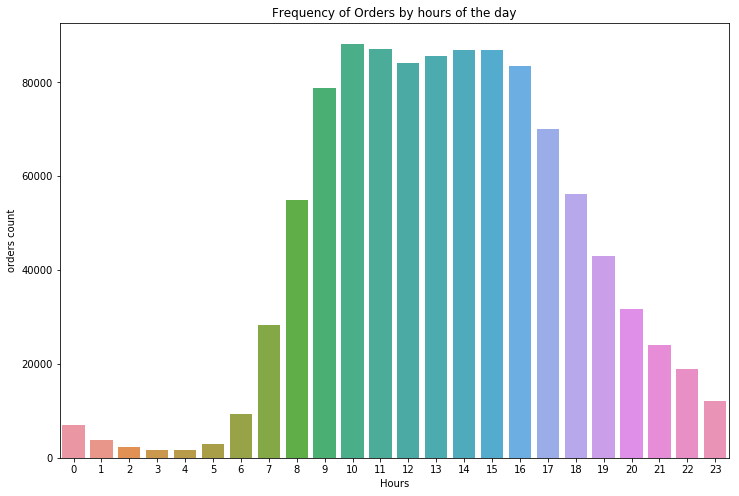

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data = orders)
plt.xlabel("Hours")
plt.ylabel("orders count")
plt.title("Frequency of Orders by hours of the day")
plt.show()

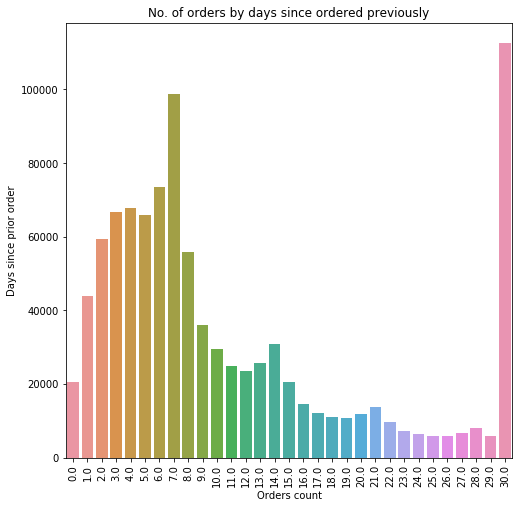

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(x="days_since_prior_order",data=orders)
plt.title("No. of orders by days since ordered previously")
plt.xlabel("Orders count")
plt.ylabel("Days since prior order")
plt.xticks(rotation="vertical")
plt.show()

In [19]:
print("The ratio of products reordered in order_products_prior: {}".format(order_products_prior["reordered"].sum()/order_products_prior.shape[0]))
print("The ratio of products reordered in order_products_train: {}".format(order_products_train["reordered"].sum()/order_products_train.shape[0]))

#59% Products 

The ratio of products reordered in order_products_prior: 0.5896974667922161
The ratio of products reordered in order_products_train: 0.5985944127509629


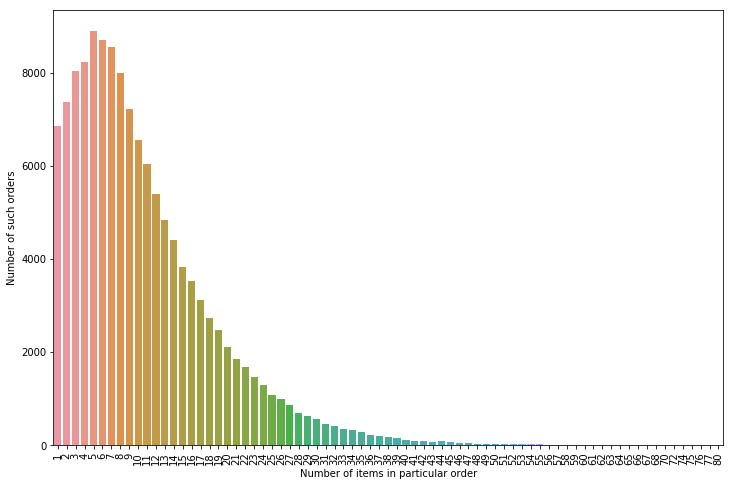

In [20]:
count = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("count").reset_index()
count = count["add_to_cart_order"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values)
plt.xlabel("Number of items in particular order")
plt.ylabel("Number of such orders")
plt.xticks(rotation="vertical")
plt.show()


In [21]:
order_products_prior = pd.merge(order_products_prior,products, on = 'product_id', how='left')
order_products_prior = pd.merge(order_products_prior,departments, on = "department_id", how="left")
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')


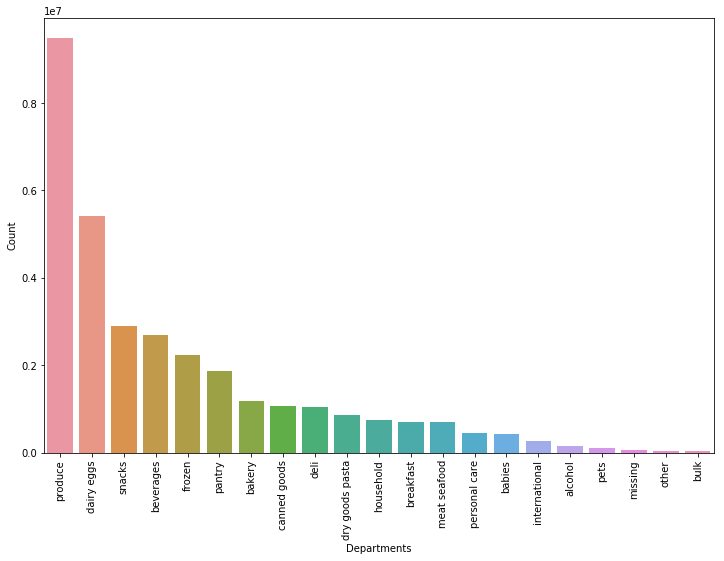

In [23]:
count = order_products_prior["department"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values)
plt.xlabel("Departments")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

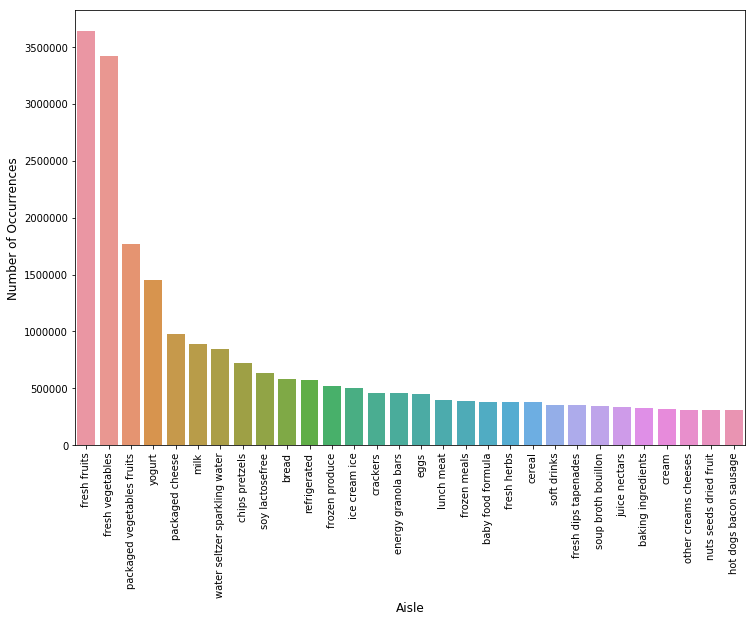

In [24]:
count = order_products_prior['aisle'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


  department  reordered
0    alcohol   0.569924
1     babies   0.578971
2     bakery   0.628141
3  beverages   0.653460
4  breakfast   0.560922


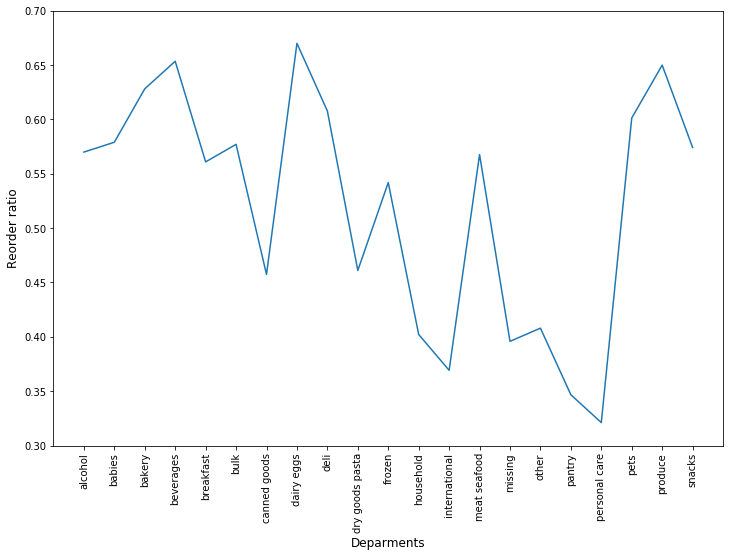

In [28]:
count = order_products_prior.groupby("department")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.lineplot(count["department"].values, count["reordered"].values)
plt.xticks(rotation = "vertical")
plt.xlabel("Deparments", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.3,0.7)
plt.show()

   order_dow  reordered
0        0.0   0.609977
1        1.0   0.599337
2        2.0   0.592013
3        3.0   0.590076
4        4.0   0.599214


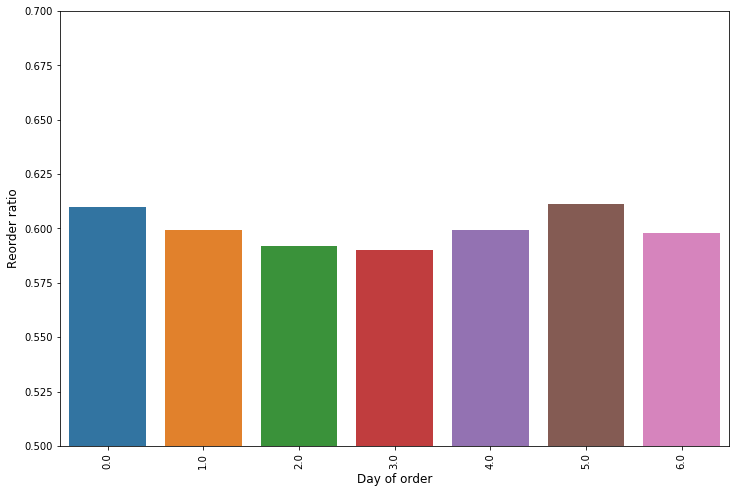

In [26]:
order_products_train = pd.merge(order_products_train, orders, on = 'order_id', how= 'left')
count = order_products_train.groupby("order_dow")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.barplot(count["order_dow"].values, count["reordered"].values)
plt.xticks(rotation = "vertical")
plt.xlabel("Day of order", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.show()

   order_hour_of_day  reordered
0                0.0   0.570491
1                1.0   0.619077
2                2.0   0.557609
3                3.0   0.639019
4                4.0   0.567288


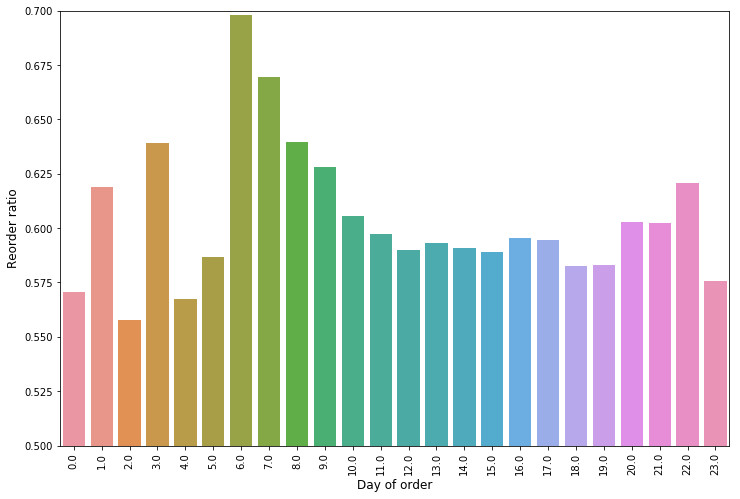

In [27]:
count = order_products_train.groupby("order_hour_of_day")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.barplot(count["order_hour_of_day"].values, count["reordered"].values)
plt.xticks(rotation = "vertical")
plt.xlabel("Day of order", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.show()